# Simple Linear Regression Assumptions

Review the four main assumptions of simple linear regression, how to check that the assumptions are met, and what to do if an assumption is not met. This will cover:

1. **Simple linear regression assumptions**
2. **How to check the validity of the assumptions**
3. **What to do if an assumption is violated**

## Simple Linear Regression Assumptions

To recap, there are four assumptions of simple linear regression:

1. **Linearity:** Each predictor variable (Xi) is linearly related to the outcome variable (Y).

2. **Normality:** The errors are normally distributed.*

3. **Independent Observations:** Each observation in the dataset is independent.

4. **Homoscedasticity:** The variance of the errors is constant or similar across the model.*

*Note on errors and residuals: 

This course has rather interchangeably used the terms "errors" and "residuals" in connection with regression. You may see this in other online resources and materials throughout your time as a data professional. In actuality, there is a difference: 

- Residuals are the difference between the predicted and observed values. 
- You can calculate residuals after you build a regression model by subtracting the predicted values from the observed values. Errors are the natural noise assumed to be in the model. 
- Residuals are used to estimate errors when checking the normality and homoscedasticity assumptions of linear regression.

## How to Check the Validity of the Assumptions

As previously reviewed, many of the simple linear regression assumptions can be checked through data visualizations. Some assumptions can be checked before a model is built, and others can only be checked after the model is constructed, and predicted values are calculated.

### Linearity

In order to assess whether or not there is a linear relationship between the independent and dependent variables, it is easiest to create a scatterplot of the dataset. The independent variable would be on the x-axis, and the dependent variable would be on the y-axis. There are a number of different Python functions that you can use to read in the data and to create a scatterplot. Some packages used for data visualizations include Matplotlib, seaborn, and Plotly. Testing the linearity assumption should occur before the model is built.


In [1]:
# Import necessary libraries
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

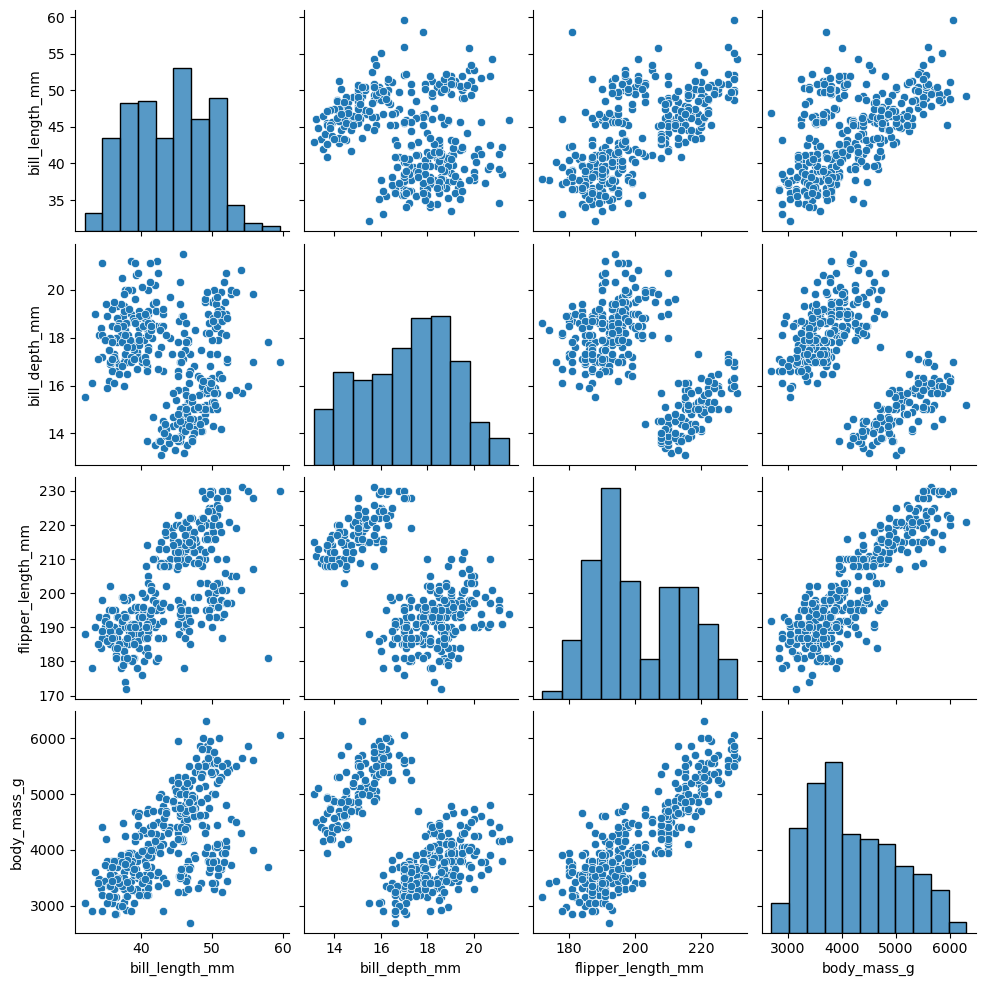

In [2]:
# Create pairwise scatterplots of Chinstrap penguins data
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins);

### Normality
The normality assumption **focuses on the errors**, which can be estimated by the residuals, or the difference between the observed values in the data and the values predicted by the regression model. For that reason, the normality assumption can only be confirmed after a model is built, and predicted values are calculated. 

Once the model has been built, you can either create a QQ-plot to check that the residuals are normally distributed, or create a histogram of the residuals. Whether the assumption is met is up to some level of interpretation, but here are a few example graphs for your reference.

In [3]:
# Generate some data to check normality
data = np.random.normal(size=100)

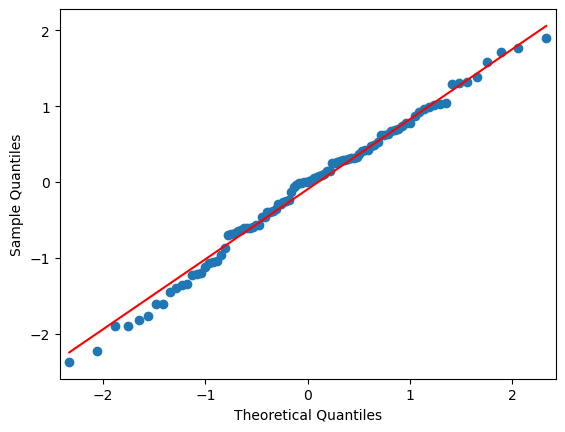

In [4]:
# Create a QQ plot
fig = sm.qqplot(data, line = 's')
plt.show();

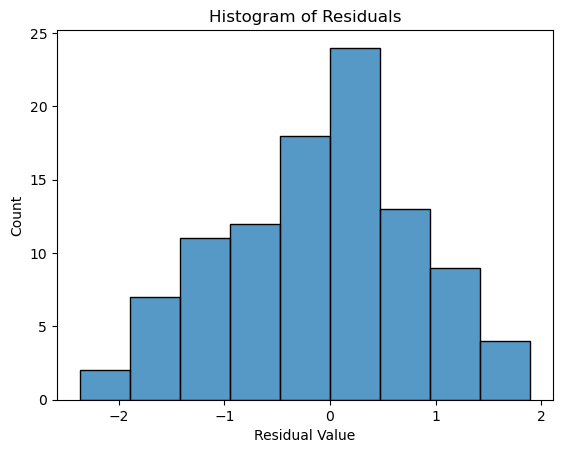

In [5]:
fig = sns.histplot(data)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show();

### Independent Observations
Whether or not observations are independent is dependent on understanding your data. Asking questions like:

- How was the data collected?

- What does each data point represent?

- Based on the data collection process, is it likely that the value of one data point impacts the value of another data point?

An objective review of these questions, which would include soliciting insights from others who might notice things you don't, can help you determine whether or not the independent observations assumption is violated. This in turn will allow you to determine your next steps in working with the dataset at hand.

### Homoscedasticity
Like the normality assumption, the homoscedasticity assumption concerns the residuals of a model, so it can only be evaluated after a regression model has already been constructed. A scatterplot of the fitted values versus the residuals can help determine whether the homoscedasticity assumption is violated.

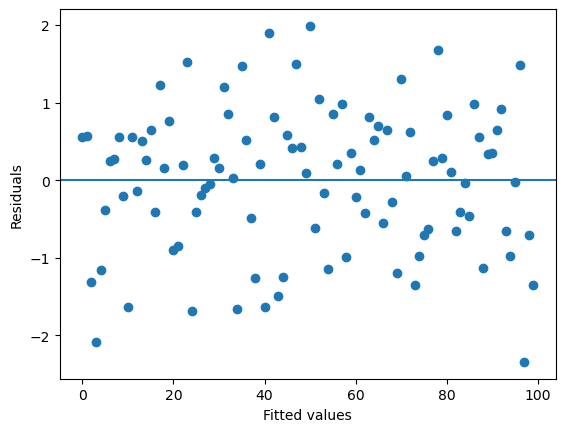

In [6]:
# Fit a linear model
model = np.polyfit(np.arange(100), data, 1)
residuals = data - model[0] * np.arange(100) - model[1]

# Create a residual plot
plt.scatter(np.arange(100), residuals)
plt.axhline(0)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

## What to do if an assumption is violated
Now that you've reviewed the four assumptions and how to test for their violations, it’s time to discuss some common next steps you can take once an assumption is violated. Keep in mind that if you transform the data, this might change how you interpret the results. Additionally, if these potential solutions don’t work for your data, you have to consider trying a different kind of model.

For now, focus on a few essential approaches to get you started!

### Linearity
- Transform one or both of the variables, such as taking the logarithm.

    - For example, if you are measuring the relationship between years of education and income, you can take the logarithm of the income variable and check if that helps the linear relationship.

### Normality
- Transform one or both variables. Most commonly, this would involve taking the logarithm of the outcome variable.

    - When the outcome variable is right skewed, such as income, the normality of the residuals can be affected. So, taking the logarithm of the outcome variable can sometimes help with this assumption.

    - If you transform a variable, you will need to reconstruct the model and then recheck the normality assumption to be sure. If the assumption is still not satisfied, you’ll have to continue troubleshooting the issue. 
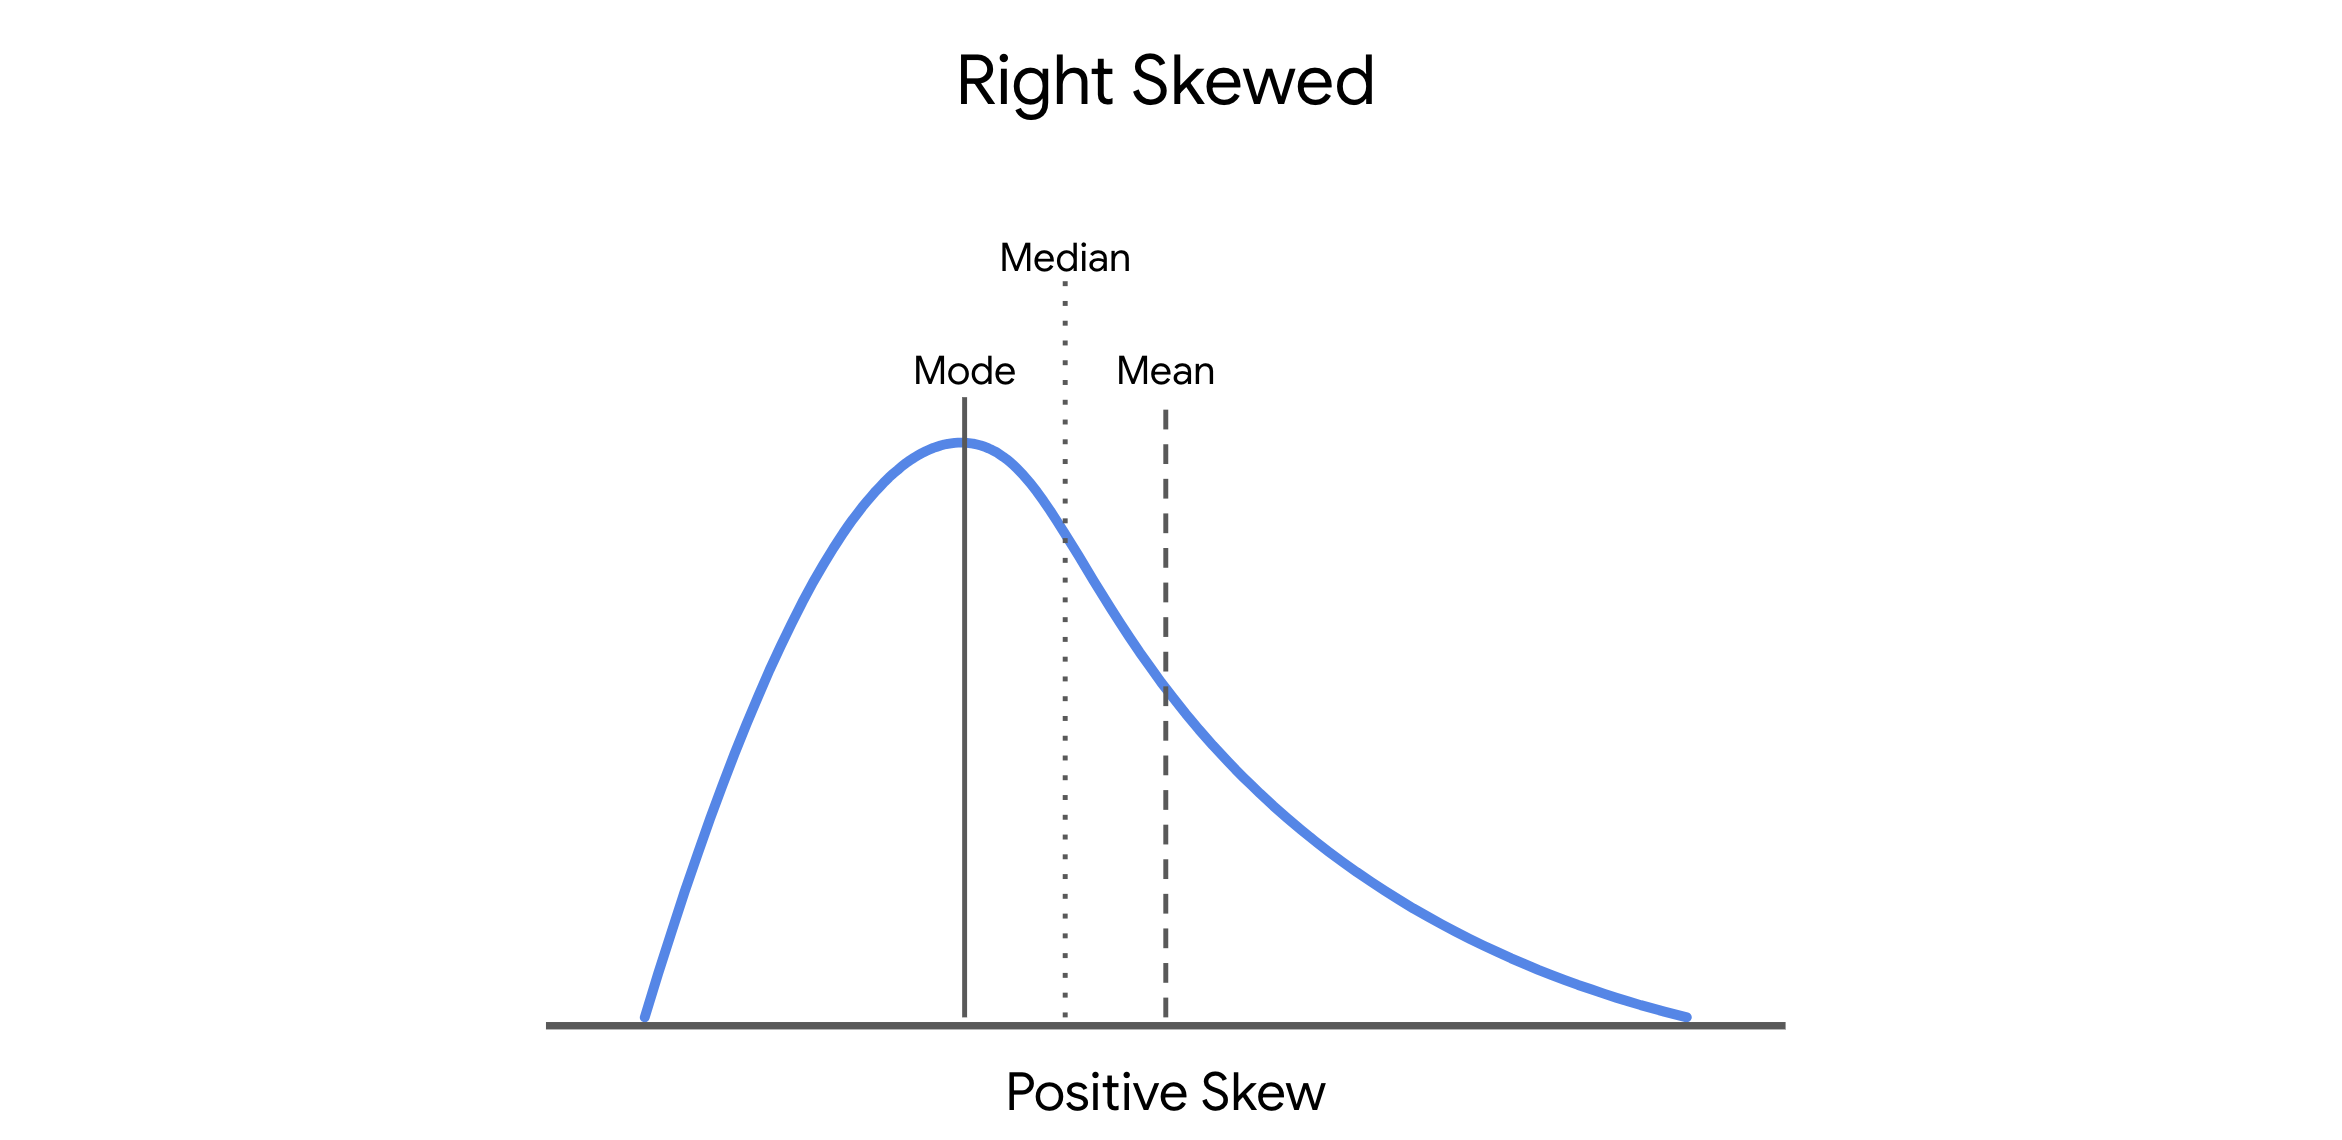

Example graph of right skewed data. Data peaks on the left with a long tail trailing to the right.

### Independent observations
- Take just a subset of the available data.

    - If, for example, you are conducting a survey and get responses from people in the same household, their responses may be correlated. You can correct for this by just keeping the data of one person in each household.

    - Another example is if you are collecting data over a time period. Let’s say you are researching data on bike rentals. If you collect your data every 15 minutes, the number of bikes rented out at 8:00 a.m. might correlate with the number of bikes rented out at 8:15 a.m. But, perhaps the number of bikes rented out is independent if the data is taken once every 2 hours, instead of once every 15 minutes.

### Homoscedasticity
- Define a different outcome variable.

    - If you are interested in understanding how a city’s population correlates with the number of restaurants in a city, you know that some cities are much more populous than others. You can then redefine the outcome variable as the ratio of population to restaurants.

- Transform the Y variable.

    - As with the above assumptions, sometimes taking the logarithm or transforming the Y variable in another way can potentially fix inconsistencies with the homoscedasticity assumption.

## Key takeaways

- There are four key assumptions for simple linear regression: linearity, normality, independent observations, and homoscedasticity.

- There are different ways to check the validity of each assumption. Some assumptions can be checked before the model is built, while some can be checked after the model is built.

- There are ways to work with the data that can correct for violations of model assumptions.

- Changing the variables will change the interpretation.

- If the assumptions are violated, even after data transformations, you should consider other models for your data.
